# **1. Imports & Environment Setup**

This cell initializes the working environment for the FD001 dataset.
A reproducible random seed is set, lightweight logging utilities are configured, and Google Drive is mounted when running in Colab.
The file paths for the FD001 training, test, and RUL datasets are defined and validated to ensure all required inputs are available before proceeding.
These checks establish a reliable foundation for the FD001 predictive maintenance pipeline.

In [1]:
# 1. Environment Setup & Path Verification (FD001)

import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Logging helper

def log(msg):
    print(f"[INFO] {msg}")


# 2. Reproducibility

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

log(f"Seed fixed at {SEED} for reproducibility.")


# 3. Mount Google Drive

try:
    from google.colab import drive
    log("Mounting Google Drive...")
    drive.mount('/content/drive')
    log("Google Drive mounted successfully.")
except ImportError:
    log("Not running in Colab — skipping drive.mount().")


# 4. FD001 Data Directory

BASE_PATH_FD001 = "/content/drive/MyDrive/OIL PREDICTIVE MAINTAINANCE/CMaps"

train_path_fd001 = os.path.join(BASE_PATH_FD001, "train_FD001.txt")
test_path_fd001  = os.path.join(BASE_PATH_FD001, "test_FD001.txt")
rul_path_fd001   = os.path.join(BASE_PATH_FD001, "RUL_FD001.txt")

log("FD001 expected file paths:")
print("   Train:", train_path_fd001)
print("   Test :", test_path_fd001)
print("   RUL  :", rul_path_fd001)


# 5. Verify file existence

missing = []
for p in [train_path_fd001, test_path_fd001, rul_path_fd001]:
    if os.path.exists(p):
        print(f" Found: {p}")
    else:
        print(f" Missing: {p}")
        missing.append(p)

if missing:
    raise FileNotFoundError(
        " ERROR: Required FD001 files are missing:\n" +
        "\n".join(missing)
    )

log("FD001 environment ready.")


[INFO] Seed fixed at 42 for reproducibility.
[INFO] Mounting Google Drive...
Mounted at /content/drive
[INFO] Google Drive mounted successfully.
[INFO] FD001 expected file paths:
   Train: /content/drive/MyDrive/OIL PREDICTIVE MAINTAINANCE/CMaps/train_FD001.txt
   Test : /content/drive/MyDrive/OIL PREDICTIVE MAINTAINANCE/CMaps/test_FD001.txt
   RUL  : /content/drive/MyDrive/OIL PREDICTIVE MAINTAINANCE/CMaps/RUL_FD001.txt
 Found: /content/drive/MyDrive/OIL PREDICTIVE MAINTAINANCE/CMaps/train_FD001.txt
 Found: /content/drive/MyDrive/OIL PREDICTIVE MAINTAINANCE/CMaps/test_FD001.txt
 Found: /content/drive/MyDrive/OIL PREDICTIVE MAINTAINANCE/CMaps/RUL_FD001.txt
[INFO] FD001 environment ready.


# **2. Define File Paths (FD001)**

This cell centralizes all file path definitions for the FD001 dataset.
By assigning clear, consistent paths for the training, test, and RUL files, the pipeline remains easy to maintain and adaptable across different environments.
These paths serve as the input sources for data loading in subsequent steps.

In [2]:
# 2. DEFINE FILE PATHS (FD001)

base_path = "/content/drive/MyDrive/OIL PREDICTIVE MAINTAINANCE/CMaps"

train_path_fd001 = f"{base_path}/train_FD001.txt"
test_path_fd001  = f"{base_path}/test_FD001.txt"
rul_path_fd001   = f"{base_path}/RUL_FD001.txt"

print("Paths set for FD001:")
print(train_path_fd001)
print(test_path_fd001)
print(rul_path_fd001)


Paths set for FD001:
/content/drive/MyDrive/OIL PREDICTIVE MAINTAINANCE/CMaps/train_FD001.txt
/content/drive/MyDrive/OIL PREDICTIVE MAINTAINANCE/CMaps/test_FD001.txt
/content/drive/MyDrive/OIL PREDICTIVE MAINTAINANCE/CMaps/RUL_FD001.txt


# **3. Load Raw FD001 Dataset**

This cell reads the FD001 dataset into structured DataFrames using the official CMAPSS column schema.
Training, test, and RUL files are parsed with consistent formatting, ensuring proper alignment of unit identifiers, cycles, settings, and sensor measurements.
Basic shape checks and a preview of the training data confirm successful loading before further preprocessing.

In [3]:
# 3. LOAD RAW FD001 DATA

# Column names
fd001_cols = ["unit", "cycle", "setting1", "setting2", "setting3"] + [f"sensor{i}" for i in range(1, 22)]

train_fd001 = pd.read_csv(train_path_fd001, sep=r"\s+", header=None, names=fd001_cols)
test_fd001  = pd.read_csv(test_path_fd001,  sep=r"\s+", header=None, names=fd001_cols)
rul_fd001   = pd.read_csv(rul_path_fd001,   sep=r"\s+", header=None)[0]

print("FD001 Train Shape:", train_fd001.shape)
print("FD001 Test Shape :", test_fd001.shape)
print("FD001 RUL Shape  :", rul_fd001.shape)

display(train_fd001.head())


FD001 Train Shape: (20631, 26)
FD001 Test Shape : (13096, 26)
FD001 RUL Shape  : (100,)


,unit,cycle,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


# **4. Deep Data Integrity Audit**

This cell performs a comprehensive structural validation of the FD001 dataset before preprocessing.
It verifies dataset shapes, datatypes, missing values, and duplicate entries, while also confirming the expected number of engines in both training and test partitions.
A preview of the training and test records ensures correct parsing and helps detect anomalies early in the pipeline.
These integrity checks guarantee that the dataset is clean and reliable for subsequent feature engineering and sequence modeling.

In [4]:
# 4. DEEP DATA INTEGRITY AUDIT (FD001)


print(" FD001 — BASIC INFO (TRAIN) ")
display(train_fd001.head())
print("\nShape (train):", train_fd001.shape)

print("\n Data types:")
print(train_fd001.dtypes)

print("\n Missing values (train):")
print(train_fd001.isna().sum())

print("\n Duplicate rows in TRAIN:", train_fd001.duplicated().sum())
print(" Duplicate rows in TEST :", test_fd001.duplicated().sum())

print("\n ENGINE COUNTS ")
print("Unique engines in TRAIN:", train_fd001["unit"].nunique())
print("Unique engines in TEST :", test_fd001["unit"].nunique())

print("\n SAMPLE OF TEST DATA ")
display(test_fd001.head())

print("\n Deep integrity audit (basic structural checks) complete.")


 FD001 — BASIC INFO (TRAIN) 


,unit,cycle,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044



Shape (train): (20631, 26)

 Data types:
unit          int64
cycle         int64
setting1    float64
setting2    float64
setting3    float64
sensor1     float64
sensor2     float64
sensor3     float64
sensor4     float64
sensor5     float64
sensor6     float64
sensor7     float64
sensor8     float64
sensor9     float64
sensor10    float64
sensor11    float64
sensor12    float64
sensor13    float64
sensor14    float64
sensor15    float64
sensor16    float64
sensor17      int64
sensor18      int64
sensor19    float64
sensor20    float64
sensor21    float64
dtype: object

 Missing values (train):
unit        0
cycle       0
setting1    0
setting2    0
setting3    0
sensor1     0
sensor2     0
sensor3     0
sensor4     0
sensor5     0
sensor6     0
sensor7     0
sensor8     0
sensor9     0
sensor10    0
sensor11    0
sensor12    0
sensor13    0
sensor14    0
sensor15    0
sensor16    0
sensor17    0
sensor18    0
sensor19    0
sensor20    0
sensor21    0
dtype: int64

 Duplicate rows in T

,unit,cycle,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130



 Deep integrity audit (basic structural checks) complete.


# **5. Per-Engine Cycle Stats & Visualization**

This cell analyzes the lifecycle duration of each engine by computing the maximum operating cycle per unit in the FD001 training dataset.
A statistical summary and distribution plot provide insights into how long engines typically run before failure, while additional checks identify unusually short sequences.
Understanding these cycle patterns is essential for selecting appropriate sequence lengths and ensuring robust temporal modeling in later stages.

 FD001 — PER-ENGINE CYCLE STATS (TRAIN) 


,cycle
count,100.000000
mean,206.310000
std,46.342749
min,128.000000
25%,177.000000
50%,199.000000
75%,229.250000
max,362.000000


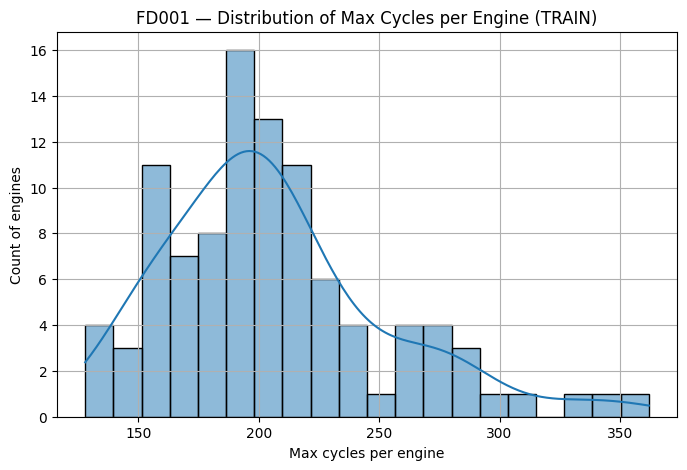


Min cycles: 128
Max cycles: 362
Engines with very short runs (<=50 cycles): 0


In [5]:
# 5. PER-ENGINE CYCLE STATS & VISUALIZATION


import matplotlib.pyplot as plt
import seaborn as sns

print(" FD001 — PER-ENGINE CYCLE STATS (TRAIN) ")

cycles_per_engine = train_fd001.groupby("unit")["cycle"].max()
display(cycles_per_engine.describe())

plt.figure(figsize=(8,5))
sns.histplot(cycles_per_engine, bins=20, kde=True)
plt.title("FD001 — Distribution of Max Cycles per Engine (TRAIN)")
plt.xlabel("Max cycles per engine")
plt.ylabel("Count of engines")
plt.grid(True)
plt.show()

print("\nMin cycles:", cycles_per_engine.min())
print("Max cycles:", cycles_per_engine.max())
print("Engines with very short runs (<=50 cycles):",
      (cycles_per_engine <= 50).sum())


# **6. Settings Distribution & Basic Visual Checks**

This cell examines the three operational settings in the FD001 dataset to verify that they fall within reasonable numerical ranges and contain no anomalies.
Summary statistics and distribution plots help confirm stable behavior across engines and cycles, ensuring that these variables can be reliably incorporated into the modeling pipeline.
These checks validate the consistency of operating conditions, which play a key role in interpreting sensor signals and engine degradation patterns.

 FD001 — SETTINGS SUMMARY (TRAIN) 


,setting1,setting2,setting3
count,20631.000000,20631.000000,20631.0
mean,-0.000009,0.000002,100.0
std,0.002187,0.000293,0.0
min,-0.008700,-0.000600,100.0
25%,-0.001500,-0.000200,100.0
50%,0.000000,0.000000,100.0
75%,0.001500,0.000300,100.0
max,0.008700,0.000600,100.0


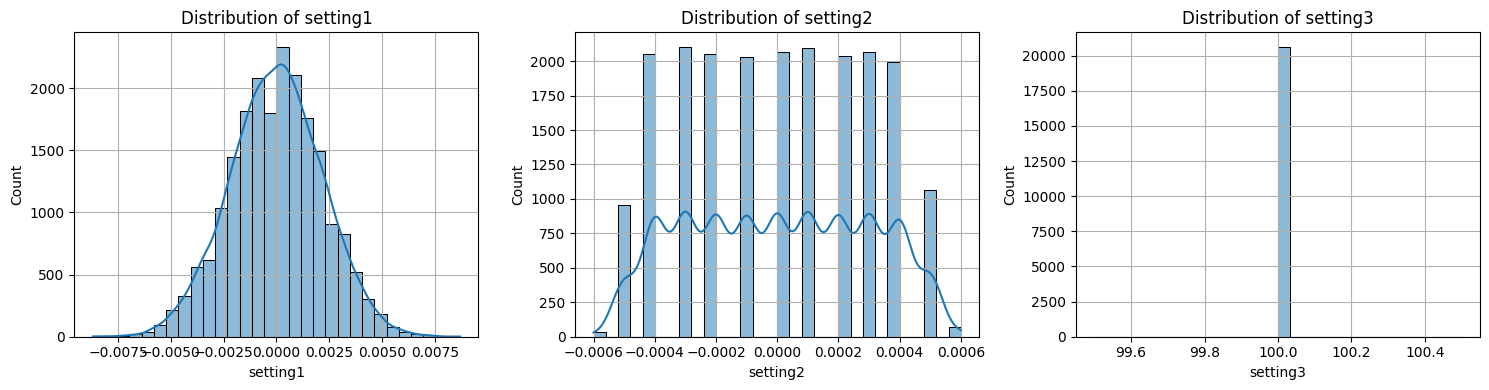


 Settings look numerically sensible (no NaNs, no crazy out-of-range spikes).


In [6]:
# 6. SETTINGS DISTRIBUTION & VISUAL CHECKS


setting_cols = ["setting1", "setting2", "setting3"]

print(" FD001 — SETTINGS SUMMARY (TRAIN) ")
display(train_fd001[setting_cols].describe())

fig, axes = plt.subplots(1, 3, figsize=(15,4))
for i, col in enumerate(setting_cols):
    sns.histplot(train_fd001[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].grid(True)
plt.tight_layout()
plt.show()

print("\n Settings look numerically sensible (no NaNs, no crazy out-of-range spikes).")


# **7. Sensor Statistics, Near-Constant Feature Detection, and Correlation Analysis (FD001)**

This cell performs a detailed diagnostic of all sensor channels in the FD001 training dataset.
It summarizes key statistical properties, identifies sensors with extremely low variance (which provide little or no predictive information), and visualizes correlations among the first set of sensors.
Detecting near-constant sensors helps streamline the feature space, while correlation analysis reveals redundancy and potential feature interactions.
These insights guide downstream feature engineering and ensure the modeling pipeline focuses on informative signals.

 FD001 — SENSOR SUMMARY (TRAIN) 


,count,mean,std,min,25%,50%,75%,max
sensor1,20631.0,518.670000,6.537152e-11,518.6700,518.6700,518.6700,518.6700,518.6700
sensor2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
sensor3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
sensor4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
sensor5,20631.0,14.620000,3.394700e-12,14.6200,14.6200,14.6200,14.6200,14.6200
sensor6,20631.0,21.609803,1.388985e-03,21.6000,21.6100,21.6100,21.6100,21.6100
sensor7,20631.0,553.367711,8.850923e-01,549.8500,552.8100,553.4400,554.0100,556.0600
sensor8,20631.0,2388.096652,7.098548e-02,2387.9000,2388.0500,2388.0900,2388.1400,2388.5600
sensor9,20631.0,9065.242941,2.208288e+01,9021.7300,9053.1000,9060.6600,9069.4200,9244.5900
sensor10,20631.0,1.300000,4.660829e-13,1.3000,1.3000,1.3000,1.3000,1.3000



 Sensor standard deviations (first 15):


,0
sensor1,6.537152e-11
sensor2,5.000533e-01
sensor3,6.131150e+00
sensor4,9.000605e+00
sensor5,3.394700e-12
sensor6,1.388985e-03
sensor7,8.850923e-01
sensor8,7.098548e-02
sensor9,2.208288e+01
sensor10,4.660829e-13



 Near-constant sensor columns in FD001 (std < 1e-06):
['sensor1', 'sensor5', 'sensor10', 'sensor16', 'sensor18', 'sensor19']


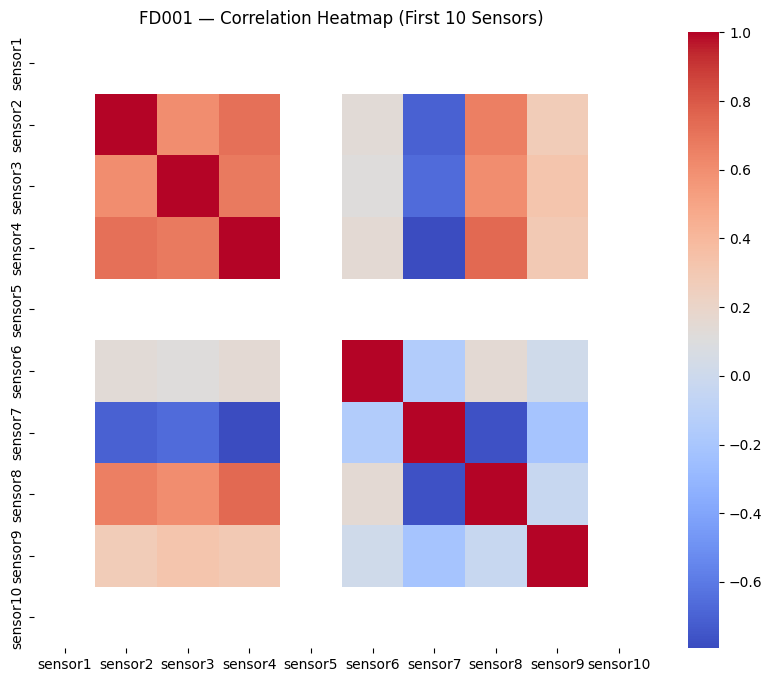


 Sensor stats, near-constant detection & correlation heatmap complete.


In [7]:
# 7. SENSOR STATS, NEAR-CONSTANT DETECTION & CORRELATION


# Only looking at sensor columns
sensor_cols = [c for c in train_fd001.columns if c.startswith("sensor")]

print(" FD001 — SENSOR SUMMARY (TRAIN) ")
display(train_fd001[sensor_cols].describe().T.head(15))

# Standard deviation of each sensor
sensor_std = train_fd001[sensor_cols].std()

print("\n Sensor standard deviations (first 15):")
display(sensor_std.head(15))

# Threshold to detect practically constant sensors
STD_THRESHOLD = 1e-6
constant_cols = sensor_std[sensor_std < STD_THRESHOLD].index.tolist()

print(f"\n Near-constant sensor columns in FD001 (std < {STD_THRESHOLD}):")
print(constant_cols)

# Quick correlation heatmap for first 10 sensors (before dropping)
subset_sensors = sensor_cols[:10]
plt.figure(figsize=(10, 8))
corr = train_fd001[subset_sensors].corr()
sns.heatmap(corr, annot=False, cmap="coolwarm", square=True)
plt.title("FD001 — Correlation Heatmap (First 10 Sensors)")
plt.show()

print("\n Sensor stats, near-constant detection & correlation heatmap complete.")


# **8. Drop Near-Constant Sensors (FD001)**

This cell removes sensor channels that exhibit negligible variation across all engine cycles, as these features carry no meaningful predictive signal.
By eliminating near-constant sensors from both the training and test datasets, the feature space becomes more efficient and focused, reducing noise and improving model performance.
The updated list of remaining sensors is then recalculated to ensure consistency for downstream feature engineering steps.

In [8]:
# 8. DROP NEAR-CONSTANT SENSORS (FD001)

print("Dropping near-constant sensor columns:", constant_cols)

# Drop only from sensor columns (settings stay untouched)
train_fd001.drop(columns=constant_cols, inplace=True)
test_fd001.drop(columns=constant_cols, inplace=True)

# Recompute sensor_cols after dropping
sensor_cols = [c for c in train_fd001.columns if c.startswith("sensor")]

print("\n After dropping near-constant sensors:")
print("Train shape:", train_fd001.shape)
print("Test  shape:", test_fd001.shape)
print("Remaining sensors:", len(sensor_cols))
print(sensor_cols)


Dropping near-constant sensor columns: ['sensor1', 'sensor5', 'sensor10', 'sensor16', 'sensor18', 'sensor19']

 After dropping near-constant sensors:
Train shape: (20631, 20)
Test  shape: (13096, 20)
Remaining sensors: 15
['sensor2', 'sensor3', 'sensor4', 'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15', 'sensor17', 'sensor20', 'sensor21']


# **9. Generate RUL Targets for Training Data (FD001)**

This cell computes the Remaining Useful Life (RUL) for every cycle of each engine in the FD001 training set.
For each unit, the maximum cycle is identified, and RUL is calculated as the difference between that value and the current cycle.
Statistical summaries and visualizations help verify the target distribution before capping.
A final sanity check confirms that the last recorded cycle for every engine correctly yields an RUL of zero—ensuring the target labels are structurally sound for supervised learning.

 Sample RUL values 


,unit,cycle,max_cycle,RUL
0,1,1,192,191
1,1,2,192,190
2,1,3,192,189
3,1,4,192,188
4,1,5,192,187
5,1,6,192,186
6,1,7,192,185
7,1,8,192,184
8,1,9,192,183
9,1,10,192,182



RUL descriptive stats (before capping):


,RUL
count,20631.000000
mean,107.807862
std,68.880990
min,0.000000
25%,51.000000
50%,103.000000
75%,155.000000
max,361.000000


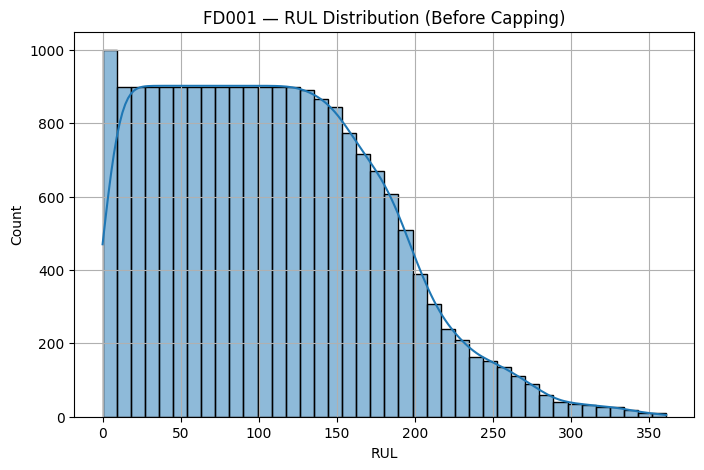


Sanity check — RUL at last cycle should be 0:


,unit,cycle,max_cycle,RUL
191,1,192,192,0
478,2,287,287,0
657,3,179,179,0
846,4,189,189,0
1115,5,269,269,0


Unique RUL at last cycles: [0]


In [9]:
# 9. GENERATE RUL FOR TRAINING DATA (FD001)

# For each engine: RUL = max_cycle - cycle
max_cycle_per_unit = train_fd001.groupby("unit")["cycle"].max()
train_fd001["max_cycle"] = train_fd001["unit"].map(max_cycle_per_unit)
train_fd001["RUL"] = train_fd001["max_cycle"] - train_fd001["cycle"]

print(" Sample RUL values ")
display(train_fd001[["unit", "cycle", "max_cycle", "RUL"]].head(10))

print("\nRUL descriptive stats (before capping):")
display(train_fd001["RUL"].describe())

plt.figure(figsize=(8,5))
sns.histplot(train_fd001["RUL"], bins=40, kde=True)
plt.title("FD001 — RUL Distribution (Before Capping)")
plt.xlabel("RUL")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# Sanity: last cycle per engine has RUL = 0
check_last = train_fd001.groupby("unit").tail(1)
print("\nSanity check — RUL at last cycle should be 0:")
display(check_last[["unit", "cycle", "max_cycle", "RUL"]].head())
print("Unique RUL at last cycles:", check_last["RUL"].unique()[:10])


# **10. Apply RUL Cap and Visualize Distribution (FD001)**

This cell applies a maximum RUL cap of 125 cycles, a common normalization strategy in CMAPSS-based predictive maintenance tasks.
Capping extreme RUL values helps stabilize training, reduces the influence of long-tail targets, and improves the model’s ability to generalize.
A summary of the capped RUL distribution and a visualization confirm the impact of this constraint on the target variable.

 Applied RUL cap of 125.
RUL summary after capping:


,RUL
count,20631.000000
mean,86.829286
std,41.673699
min,0.000000
25%,51.000000
50%,103.000000
75%,125.000000
max,125.000000


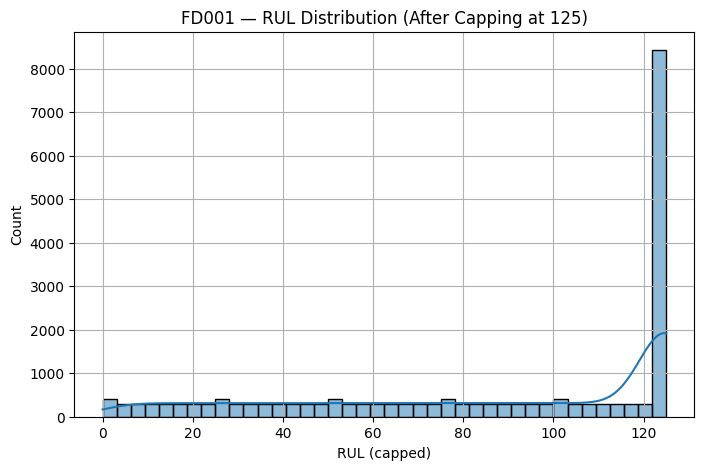

In [10]:
# 10. APPLY RUL CAP (125) & VISUALIZE


RUL_CAP = 125
train_fd001["RUL"] = np.minimum(train_fd001["RUL"], RUL_CAP)

print(" Applied RUL cap of 125.")
print("RUL summary after capping:")
display(train_fd001["RUL"].describe())

plt.figure(figsize=(8,5))
sns.histplot(train_fd001["RUL"], bins=40, kde=True)
plt.title("FD001 — RUL Distribution (After Capping at 125)")
plt.xlabel("RUL (capped)")
plt.ylabel("Count")
plt.grid(True)
plt.show()


# **11. Train/Validation Split, Feature Selection, and Scaler Setup (FD001)**

This cell prepares the FD001 dataset for supervised modeling by performing an engine-wise train/validation split, ensuring that no cycles from the same engine appear in both sets.
Feature columns are then defined by excluding identifier and target fields, resulting in a clean set of inputs for learning.
A MinMaxScaler is fitted on the training features to guarantee consistent normalization across training and validation data, which is essential for stable deep learning performance.

In [11]:
# 11. TRAIN/VAL SPLIT + FEATURE COLUMNS & SCALER


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 1) Train/Val split by engine ID
engine_ids = train_fd001["unit"].unique()
train_ids, val_ids = train_test_split(
    engine_ids,
    test_size=0.2,
    random_state=42,
)

train_df = train_fd001[train_fd001["unit"].isin(train_ids)].reset_index(drop=True)
val_df   = train_fd001[train_fd001["unit"].isin(val_ids)].reset_index(drop=True)

print("Train engines:", len(train_ids))
print("Val engines  :", len(val_ids))
print("Train shape  :", train_df.shape)
print("Val shape    :", val_df.shape)

# 2) Feature columns (exclude ID + helper + target)
exclude_cols = ["unit", "cycle", "max_cycle", "RUL"]
feature_cols = [c for c in train_df.columns if c not in exclude_cols]

print("\n Number of feature columns:", len(feature_cols))
print(feature_cols)

# 3) Fit scaler on TRAIN features only
scaler_fd001 = MinMaxScaler()
scaler_fd001.fit(train_df[feature_cols])

print("\n Scaler fitted on FD001 training feature columns.")


Train engines: 80
Val engines  : 20
Train shape  : (16561, 22)
Val shape    : (4070, 22)

 Number of feature columns: 18
['setting1', 'setting2', 'setting3', 'sensor2', 'sensor3', 'sensor4', 'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15', 'sensor17', 'sensor20', 'sensor21']

 Scaler fitted on FD001 training feature columns.


# **12. Feature Engineering: Rolling Statistics & Delta Features (FD001)**

This step enhances the temporal information available in the FD001 dataset by generating per-engine time-dependent features.
Three types of engineered features are added for every sensor:

Rolling Means (3-cycle & 5-cycle) – capture short- and medium-term trends.

Rolling Standard Deviations – capture sensor volatility and instability.

Delta Features (cycle-to-cycle differences) – capture sudden changes that often signal upcoming failure.

These engineered signals significantly improve the predictive capability of RUL models, especially deep sequence models like LSTM/GRU, which benefit from richer temporal context.

The function creates a new DataFrame and keeps the original data intact. Rolling std NaNs (early cycles) are filled with zero to avoid gaps.
Feature engineering is applied consistently to train, validation, and test datasets to maintain feature alignment.

In [12]:
# 12. FEATURE ENGINEERING (ROLLING & DELTA) — FD001


log("Starting feature engineering for FD001 (rolling + delta)...")

def add_rolling_and_delta_features(df, sensor_cols, win_short=3, win_long=5):
    """
    Adds rolling mean/std and delta (difference) features per sensor, per engine.
    Returns a NEW dataframe (does not modify in-place).
    """
    df = df.sort_values(["unit", "cycle"]).copy()

    for sensor in sensor_cols:
        grp = df.groupby("unit")[sensor]

        # Rolling means
        df[f"{sensor}_roll{win_short}_mean"] = (
            grp.rolling(win_short, min_periods=1).mean().reset_index(0, drop=True)
        )
        df[f"{sensor}_roll{win_short}_std"] = (
            grp.rolling(win_short, min_periods=1).std().reset_index(0, drop=True)
        )
        df[f"{sensor}_roll{win_long}_mean"] = (
            grp.rolling(win_long, min_periods=1).mean().reset_index(0, drop=True)
        )
        df[f"{sensor}_roll{win_long}_std"] = (
            grp.rolling(win_long, min_periods=1).std().reset_index(0, drop=True)
        )

        # Delta feature
        df[f"{sensor}_delta"] = grp.diff().fillna(0).values

    # Replace NaNs from rolling std at early cycles
    df = df.fillna(0.0)
    return df

# Apply to train, val, test
train_fd001_fe = add_rolling_and_delta_features(train_df, sensor_cols)
val_fd001_fe   = add_rolling_and_delta_features(val_df, sensor_cols)
test_fd001_fe  = add_rolling_and_delta_features(test_fd001, sensor_cols)

log(f"Feature engineering done. Shapes:")
print("  Train FE:", train_fd001_fe.shape)
print("  Val   FE:", val_fd001_fe.shape)
print("  Test  FE:", test_fd001_fe.shape)

print("\nSample engineered columns:")
print([c for c in train_fd001_fe.columns if "roll" in c or "delta" in c][:20])


[INFO] Starting feature engineering for FD001 (rolling + delta)...
[INFO] Feature engineering done. Shapes:
  Train FE: (16561, 97)
  Val   FE: (4070, 97)
  Test  FE: (13096, 95)

Sample engineered columns:
['sensor2_roll3_mean', 'sensor2_roll3_std', 'sensor2_roll5_mean', 'sensor2_roll5_std', 'sensor2_delta', 'sensor3_roll3_mean', 'sensor3_roll3_std', 'sensor3_roll5_mean', 'sensor3_roll5_std', 'sensor3_delta', 'sensor4_roll3_mean', 'sensor4_roll3_std', 'sensor4_roll5_mean', 'sensor4_roll5_std', 'sensor4_delta', 'sensor6_roll3_mean', 'sensor6_roll3_std', 'sensor6_roll5_mean', 'sensor6_roll5_std', 'sensor6_delta']


# **13. Final Feature Matrix Construction & Scaling (FD001)**

After completing feature engineering, this step prepares the final input matrices for model training.
Here’s what happens:

1. Select Final Feature Columns

We exclude non-predictor columns such as:

unit

cycle

max_cycle

RUL
All remaining engineered features (rolling means, rolling std, deltas, raw sensors, settings) become the final feature set.

2. Fit the MinMaxScaler on TRAIN Only

To avoid data leakage, scaling is performed as follows:

Fit the scaler only on engineered training features

Apply the same transformation to validation and test datasets

This ensures consistent feature ranges across datasets and stable model training.

3. Output Matrices

The result is:

X_train_scaled

X_val_scaled

X_test_scaled

These matrices form the foundation for sequence building in later steps (LSTM/GRU input construction).

In [13]:
# 13. FINAL FEATURE MATRIX & SCALING — FD001


from sklearn.preprocessing import MinMaxScaler

log("Preparing final feature matrices and scaling (FD001)...")

exclude_cols = ["unit", "cycle", "max_cycle", "RUL"]

feature_cols_final_fd001 = [
    c for c in train_fd001_fe.columns
    if c not in exclude_cols
]

print(" Number of FINAL feature columns (FD001):", len(feature_cols_final_fd001))
print(feature_cols_final_fd001[:25])

# Refit scaler on engineered TRAIN features
scaler_fd001 = MinMaxScaler()
X_train_scaled = scaler_fd001.fit_transform(train_fd001_fe[feature_cols_final_fd001])
X_val_scaled   = scaler_fd001.transform(val_fd001_fe[feature_cols_final_fd001])
X_test_scaled  = scaler_fd001.transform(test_fd001_fe[feature_cols_final_fd001])

log("Scaling complete.")
print("Scaled shapes:")
print("  X_train_scaled:", X_train_scaled.shape)
print("  X_val_scaled  :", X_val_scaled.shape)
print("  X_test_scaled :", X_test_scaled.shape)


[INFO] Preparing final feature matrices and scaling (FD001)...
 Number of FINAL feature columns (FD001): 93
['setting1', 'setting2', 'setting3', 'sensor2', 'sensor3', 'sensor4', 'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15', 'sensor17', 'sensor20', 'sensor21', 'sensor2_roll3_mean', 'sensor2_roll3_std', 'sensor2_roll5_mean', 'sensor2_roll5_std', 'sensor2_delta', 'sensor3_roll3_mean', 'sensor3_roll3_std']
[INFO] Scaling complete.
Scaled shapes:
  X_train_scaled: (16561, 93)
  X_val_scaled  : (4070, 93)
  X_test_scaled : (13096, 93)


# **14. Classical Baseline Models (RF & XGB) — FD001**

This cell establishes non-sequence baseline models using traditional machine-learning regressors. These models serve as an essential benchmark for comparing the performance of deep learning models (LSTM, GRU, Hybrid).

1. Baseline Feature Matrices (No Sequences)

We use the engineered + scaled features directly (no timesteps), which allows:

Quick model training

Fast evaluation

Initial sanity-check that features are meaningful

Target variable is the capped RUL (RUL ≤ 125).

2. Random Forest Regressor

A strong tree-based ensemble model:

Captures non-linear relationships

Resistant to scaling issues

Good first baseline

We evaluate RF on validation data using:

RMSE

MAE

3. XGBoost Regressor (if available)

A more powerful gradient-boosted tree model:

Often outperforms RF

Effective for tabular regression

Handles interactions automatically

If xgboost is not installed, the pipeline gracefully skips it.

Purpose of This Cell

Establish classical reference scores before moving to deep models

Detect if feature engineering is effective

Provide fallback models in the final unified pipeline

These baselines are not sequence-aware, so deep learning models should ideally outperform them.


In [14]:
# 14. CLASSICAL BASELINE MODELS (RF & XGB) — FD001


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

log("Training CLASSICAL BASELINE MODELS (RF & XGB) for FD001...")

# ---------------------------------------------
# 1) Prepare baseline feature matrices (no sequences)
#    I used the engineered + scaled rows.
# ---------------------------------------------
X_train_base = X_train_scaled
X_val_base   = X_val_scaled

y_train_base = train_fd001_fe["RUL"].values
y_val_base   = val_fd001_fe["RUL"].values

print("Baseline X_train shape:", X_train_base.shape)
print("Baseline X_val   shape:", X_val_base.shape)
print("Baseline y_train shape:", y_train_base.shape)
print("Baseline y_val   shape:", y_val_base.shape)


# 2) Random Forest Baseline

rf_fd001 = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    n_jobs=-1,
    random_state=SEED,
    min_samples_split=4,
    min_samples_leaf=2,
)

log("Fitting RandomForest baseline for FD001...")
rf_fd001.fit(X_train_base, y_train_base)

y_val_pred_rf = rf_fd001.predict(X_val_base)

rmse_rf_fd001 = np.sqrt(mean_squared_error(y_val_base, y_val_pred_rf))
mae_rf_fd001  = mean_absolute_error(y_val_base, y_val_pred_rf)

print("\n FD001 RANDOM FOREST BASELINE — VALIDATION PERFORMANCE ")
print(f"RMSE (val): {rmse_rf_fd001:.4f}")
print(f"MAE  (val): {mae_rf_fd001:.4f}")


# 3) XGBoost Baseline

try:
    from xgboost import XGBRegressor

    xgb_fd001 = XGBRegressor(
        n_estimators=400,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=SEED,
        tree_method="hist",
    )

    log("Fitting XGBoost baseline for FD001...")
    xgb_fd001.fit(X_train_base, y_train_base)

    y_val_pred_xgb = xgb_fd001.predict(X_val_base)

    rmse_xgb_fd001 = np.sqrt(mean_squared_error(y_val_base, y_val_pred_xgb))
    mae_xgb_fd001  = mean_absolute_error(y_val_base, y_val_pred_xgb)

    print("\n FD001 XGBOOST BASELINE — VALIDATION PERFORMANCE ")
    print(f"RMSE (val): {rmse_xgb_fd001:.4f}")
    print(f"MAE  (val): {mae_xgb_fd001:.4f}")

except ImportError:
    log("xgboost is not installed — skipping XGBoost baseline.")
    rmse_xgb_fd001 = None
    mae_xgb_fd001  = None

log("FD001 classical baselines (RF/XGB) training complete.")


[INFO] Training CLASSICAL BASELINE MODELS (RF & XGB) for FD001...
Baseline X_train shape: (16561, 93)
Baseline X_val   shape: (4070, 93)
Baseline y_train shape: (16561,)
Baseline y_val   shape: (4070,)
[INFO] Fitting RandomForest baseline for FD001...

 FD001 RANDOM FOREST BASELINE — VALIDATION PERFORMANCE 
RMSE (val): 16.3972
MAE  (val): 11.5974
[INFO] Fitting XGBoost baseline for FD001...

 FD001 XGBOOST BASELINE — VALIDATION PERFORMANCE 
RMSE (val): 16.4235
MAE  (val): 11.6749
[INFO] FD001 classical baselines (RF/XGB) training complete.


# **15. Sequence Builder Function (FD001)**

This cell constructs time-series sequences from the engineered and scaled tabular data. Deep learning models like LSTM, GRU, and Hybrid architectures require fixed-length temporal windows rather than single rows, so this function is essential for preparing data for sequence-based modeling.

Why We Need This Step

Each engine produces a sequence of sensor readings over many cycles.
The deep models must learn patterns such as:

How sensors evolve as failure approaches

Short-term vs long-term degradation trends

Temporal dependencies and rate-of-change patterns

To capture these behaviors, we transform the row-based dataset into overlapping sliding windows of length 30 cycles (configurable via SEQ_LEN_FD001).

How the Function Works

For each engine:

Select all rows belonging to that engine (unit).

Extract the corresponding scaled feature matrix.

Slide a 30-cycle window across the engine timeline.

Each window becomes:

X_seq → shape (seq_len, num_features)

y_seq → RUL value at the last timestep of the window

This preserves chronological order and ensures the model learns predictive degradation patterns.

Output

The function returns:

X_seq → NumPy array of shape (num_sequences, seq_len, n_features)

y_seq → Array of RUL labels aligned with each sequence

These arrays feed directly into the deep learning models in the next step.

In [15]:
# 15 — SEQUENCE BUILDER FUNCTION (FD001)


import numpy as np

SEQ_LEN_FD001 = 30  # 30-cycle history window
log(f"FD001 sequence length set to {SEQ_LEN_FD001}.")

def build_sequences_fd001(X_scaled, df_base, seq_len):
    """
    Build sliding-window sequences for FD001.
    - X_scaled: numpy array of scaled features (same row order as df_base)
    - df_base : dataframe with 'unit' and 'RUL'
    """
    X_seq, y_seq = [], []

    for unit_id in df_base["unit"].unique():
        mask = df_base["unit"] == unit_id
        X_unit = X_scaled[mask]
        y_unit = df_base.loc[mask, "RUL"].values

        if len(X_unit) < seq_len:
            continue

        for i in range(len(X_unit) - seq_len + 1):
            X_seq.append(X_unit[i : i + seq_len])
            y_seq.append(y_unit[i + seq_len - 1])

    return np.array(X_seq), np.array(y_seq)


[INFO] FD001 sequence length set to 30.


# **16. Build Train & Validation Sequences (FD001)**

This cell converts the scaled and feature-engineered tabular data into fixed-length time-series sequences required by the LSTM/GRU/Hybrid deep learning models.

Purpose of This Step

While classical models (RF, XGB) operate on row-wise features, deep learning models require temporal windows so they can learn:

Engine degradation patterns over time

How sensor values evolve as failure approaches

The relationship between past cycles and current RUL

Without sequence construction, the deep models cannot capture temporal dependencies.

What This Cell Does

Uses the build_sequences_fd001() function from Cell 15

Builds overlapping sliding windows of length SEQ_LEN_FD001 (30 cycles)

Generates:

X_train_seq — training sequences

y_train_seq — corresponding training RUL labels

X_val_seq — validation sequences

y_val_seq — validation labels

Output Shapes

Each output has the following structure:

X_*_seq: (num_sequences, seq_len, num_features)

y_*_seq: (num_sequences,)

The number of sequences depends on engine lengths and the sliding window.

This step finalizes the dataset for the deep learning phase.

In [16]:
# 16. BUILD TRAIN & VALIDATION SEQUENCES (FD001)


log("Building TRAIN and VALIDATION sequences for FD001...")

X_train_seq, y_train_seq = build_sequences_fd001(
    X_train_scaled,
    train_fd001_fe,
    SEQ_LEN_FD001,
)

X_val_seq, y_val_seq = build_sequences_fd001(
    X_val_scaled,
    val_fd001_fe,
    SEQ_LEN_FD001,
)

print("X_train_seq shape:", X_train_seq.shape)
print("y_train_seq shape:", y_train_seq.shape)
print("X_val_seq   shape:", X_val_seq.shape)
print("y_val_seq   shape:", y_val_seq.shape)

log("Sequence construction (train/val) complete.")


[INFO] Building TRAIN and VALIDATION sequences for FD001...
X_train_seq shape: (14241, 30, 93)
y_train_seq shape: (14241,)
X_val_seq   shape: (3490, 30, 93)
y_val_seq   shape: (3490,)
[INFO] Sequence construction (train/val) complete.


# **17. Build Test Last-Window Sequences (FD001)**

In the FD001 test set, NASA follows a different evaluation rule compared to training and validation:

You do not create sliding windows.

For each engine, you only take the last seq_len cycles.

This last window represents the final operational condition before failure.

The true RUL is provided separately in RUL_FD001.txt.

Purpose of This Cell

This step prepares the exact test input format required for LSTM/GRU/Hybrid models:

Each test engine → one sequence of length 30 (or whatever SEQ_LEN_FD001 is).

Each sequence predicts a single RUL value.

This perfectly matches NASA’s CMAPSS evaluation protocol.

What the Function Does

build_test_last_window_sequences_fd001():

Iterates through each test engine

Extracts the last seq_len rows of scaled sensor data

Appends this as one test sequence

Retrieves the true RUL from NASA's RUL file (index-based: engine 1 → index 0)

Returns:

X_test_last_seq → model-ready test sequences

y_test_last_true → true RUL values for benchmark scoring

Output Shapes

X_test_last_seq:
(num_engines, seq_len, num_features)

y_test_last_true:
(num_engines, )

These outputs are required for:

Final model prediction

NASA asymmetric scoring

Error analysis

This completes the test-set preparation for FD001.

In [17]:
# 17. BUILD TEST LAST-WINDOW SEQUENCES (FD001)


log("Building TEST last-window sequences for FD001...")

def build_test_last_window_sequences_fd001(X_scaled, df_base, rul_vector, seq_len):
    """
    For each test engine, take the LAST `seq_len` cycles as one sequence.
    Target RUL = value from RUL_FD001.txt for that engine (NASA rule).
    """
    X_seq = []
    y_true = []

    for unit_id in sorted(df_base["unit"].unique()):
        mask = df_base["unit"] == unit_id
        X_unit = X_scaled[mask]

        if len(X_unit) < seq_len:
            continue

        seq = X_unit[-seq_len:]
        X_seq.append(seq)

        true_rul = rul_vector.iloc[unit_id - 1]  # engine 1 -> index 0
        y_true.append(true_rul)

    return np.array(X_seq), np.array(y_true)

X_test_last_seq, y_test_last_true = build_test_last_window_sequences_fd001(
    X_test_scaled,
    test_fd001_fe,
    rul_fd001,
    SEQ_LEN_FD001,
)

print("X_test_last_seq shape:", X_test_last_seq.shape)
print("y_test_last_true shape:", y_test_last_true.shape)

log("FD001 TEST last-window sequence building complete.")


[INFO] Building TEST last-window sequences for FD001...
X_test_last_seq shape: (100, 30, 93)
y_test_last_true shape: (100,)
[INFO] FD001 TEST last-window sequence building complete.


# **18. Sanity Check for NaN Values (FD001)**

Before training any deep learning or classical model, it is critical to verify that no NaN (missing) values exist in:

Feature matrices

X_train_scaled

X_val_scaled

X_test_last_seq

RUL target arrays

y_train_seq

y_val_seq

y_test_last_true

Even a single NaN can cause:

Model training to fail

Silent numerical instability

Wrong evaluation metrics

Incorrect NASA scoring

This cell performs a full NaN audit across all training, validation, and test structures generated so far.

What This Cell Does

Uses np.isnan().sum() to count NaNs in:

Scaled feature matrices

Train/val/test RUL labels

Prints detailed summary of NaN counts

If all counts are zero → safe to proceed

Otherwise → warns that preprocessing must be fixed

Why This Check Is Important

Rolling windows, deltas, padding, or scaling operations may sometimes introduce NaNs.

Test last-window sequences also need verification because engines with fewer cycles may produce incomplete windows if not handled carefully.

Ensures complete data integrity before moving into model training (LSTM/GRU/Hybrid).

If this cell passes with NO NaN VALUES FOUND, we are ready to continue to target scaling and deep model training.

In [18]:
# 18. SANITY CHECK FOR NaN VALUES (FD001)


log("Checking for NaN values in FD001 features and targets...")

import numpy as np

# Check train features
nan_train_features = np.isnan(X_train_scaled).sum()
nan_val_features   = np.isnan(X_val_scaled).sum()
nan_test_features  = np.isnan(X_test_last_seq).sum()

# Check train/val RUL labels
nan_y_train = np.isnan(y_train_seq).sum()
nan_y_val   = np.isnan(y_val_seq).sum()
nan_y_test  = np.isnan(y_test_last_true).sum()

print("\n FEATURE NaN CHECK ")
print(f"Train features NaN count : {nan_train_features}")
print(f"Val   features NaN count : {nan_val_features}")
print(f"Test  features NaN count : {nan_test_features}")

print("\n TARGET NaN CHECK ")
print(f"Train RUL NaN count : {nan_y_train}")
print(f"Val   RUL NaN count : {nan_y_val}")
print(f"Test  RUL NaN count : {nan_y_test}")

if (
    nan_train_features == 0 and
    nan_val_features == 0 and
    nan_test_features == 0 and
    nan_y_train == 0 and
    nan_y_val == 0 and
    nan_y_test == 0
):
    print("\n NO NaN VALUES FOUND — SAFE TO PROCEED. ")
else:
    print("\n WARNING: NaN values detected! FIX BEFORE TRAINING.")


[INFO] Checking for NaN values in FD001 features and targets...

 FEATURE NaN CHECK 
Train features NaN count : 0
Val   features NaN count : 0
Test  features NaN count : 0

 TARGET NaN CHECK 
Train RUL NaN count : 0
Val   RUL NaN count : 0
Test  RUL NaN count : 0

 NO NaN VALUES FOUND — SAFE TO PROCEED. 


# **19. Normalize RUL Targets for Sequence Modeling (FD001)**

Deep learning models (LSTM/GRU/Hybrid) typically perform better when the target variable is scaled to a small, continuous range. Since RUL values can vary widely and are capped at 125 cycles, applying a consistent scaling method improves:

Gradient stability

Convergence speed

Training stability

Loss magnitude consistency across datasets

We use MinMaxScaler to compress RUL values into the range [0, 1], fitted only on the training targets to avoid validation leakage.

What This Cell Does

Initializes a dedicated RUL scaler (rul_scaler_fd001) separate from feature scaling

Fits the scaler on the flattened training RUL array

Transforms both training and validation RUL targets

Prints a comparison of original vs. scaled values for sanity

Why This Step Is Important

Sequence models learn temporal patterns more effectively when both inputs and outputs share similar numeric ranges

NASA scoring and calibration require unscaled RUL values later → so scaling must be reversible using the fitted scaler

Storing this scaler ensures consistent post-processing during test prediction and in the unified pipeline

You must save this scaler along with the model weights so the final unified pipeline can invert-transform predictions back to real RUL before NASA scoring.

In [19]:
# 19. NORMALIZE RUL TARGETS FOR SEQ MODELING (FD001)


from sklearn.preprocessing import MinMaxScaler

log("Normalizing RUL targets for FD001 sequence models...")

rul_scaler_fd001 = MinMaxScaler()

y_train_seq_scaled = rul_scaler_fd001.fit_transform(
    y_train_seq.reshape(-1, 1)
)
y_val_seq_scaled = rul_scaler_fd001.transform(
    y_val_seq.reshape(-1, 1)
)

print(" RUL scaling complete.")
print("Sample original vs scaled (first 5):")
for orig, scaled in zip(y_train_seq[:5], y_train_seq_scaled[:5]):
    print(f"RUL {orig:6.1f}  ->  {scaled[0]:.6f}")


[INFO] Normalizing RUL targets for FD001 sequence models...
 RUL scaling complete.
Sample original vs scaled (first 5):
RUL  125.0  ->  1.000000
RUL  125.0  ->  1.000000
RUL  125.0  ->  1.000000
RUL  125.0  ->  1.000000
RUL  125.0  ->  1.000000


# **20. Baseline LSTM Model (FD001)**

This cell defines, trains, and evaluates the baseline LSTM model for FD001.
The goal of this baseline model is to establish a simple, interpretable benchmark before moving to tuned and hybrid architectures.

📌 What This Cell Does

Defines a simple LSTM architecture

One LSTM layer (64 units)

One Dropout layer (0.2) for regularization

Linear output layer to predict continuous RUL

Compiles the model

Loss: Mean Squared Error (MSE)

Optimizer: Adam(learning rate = 1e-3)

Trains the model

20 epochs

Batch size = 128

Early stopping (patience=3) to prevent overfitting

Training target is scaled RUL, not raw RUL

Evaluates on validation sequences

Predictions are inverse-transformed to real RUL

Computes RMSE and MAE (real scale)

📌 Why This Step Is Important

LSTM models are well-suited for NASA CMAPSS because the data is time-dependent, and LSTMs learn degradation trends over cycles.

A simple baseline model helps determine whether deeper or hybrid architectures offer meaningful improvements.

Validation metrics (RMSE/MAE) are used later in the model leaderboard to compare against GRU, tuned, and hybrid models.

This baseline is also useful for debugging: if tuned models perform worse, we check back against this stable reference.

📌 Key Notes for the Unified Pipeline

Store model_lstm_base_fd001 if it becomes the best model for FD001.

Ensure target rescaling (rul_scaler_fd001) is always saved—it's needed for test-set prediction and NASA scoring.

The architecture is intentionally lightweight to ensure fast training even on Colab.

In [20]:
# 20. BASELINE LSTM (FD001)


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

log("Training BASELINE LSTM model for FD001...")

n_timesteps = X_train_seq.shape[1]   # 30
n_features  = X_train_seq.shape[2]   # 93

def build_lstm_baseline_fd001(seq_len, n_features):
    model = Sequential()
    model.add(
        LSTM(
            64,
            return_sequences=False,
            input_shape=(seq_len, n_features),
        )
    )
    model.add(Dropout(0.2))
    model.add(Dense(1, activation="linear"))

    model.compile(
        loss="mse",
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    )
    return model

model_lstm_base_fd001 = build_lstm_baseline_fd001(n_timesteps, n_features)
model_lstm_base_fd001.summary()

early_stop_lstm_base = EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True,
    verbose=1,
)

history_lstm_base_fd001 = model_lstm_base_fd001.fit(
    X_train_seq,
    y_train_seq_scaled,
    validation_data=(X_val_seq, y_val_seq_scaled),
    epochs=20,
    batch_size=128,
    callbacks=[early_stop_lstm_base],
    verbose=2,
)

# ---- Validation metrics (unscaled RUL) ----
val_pred_lstm_base_scaled = model_lstm_base_fd001.predict(X_val_seq).ravel()
val_pred_lstm_base = rul_scaler_fd001.inverse_transform(
    val_pred_lstm_base_scaled.reshape(-1, 1)
).ravel()

rmse_lstm_base_fd001 = np.sqrt(mean_squared_error(y_val_seq, val_pred_lstm_base))
mae_lstm_base_fd001  = mean_absolute_error(y_val_seq, val_pred_lstm_base)

print("\n FD001 BASELINE LSTM — VALIDATION PERFORMANCE ")
print(f"RMSE (val): {rmse_lstm_base_fd001:.4f}")
print(f"MAE  (val): {mae_lstm_base_fd001:.4f}")


[INFO] Training BASELINE LSTM model for FD001...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        40,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,513 (158.25 KB)

 Trainable params: 40,513 (158.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
112/112 - 7s - 67ms/step - loss: 0.0530 - val_loss: 0.0232
Epoch 2/20
112/112 - 6s - 50ms/step - loss: 0.0312 - val_loss: 0.0180
Epoch 3/20
112/112 - 11s - 98ms/step - loss: 0.0240 - val_loss: 0.0139
Epoch 4/20
112/112 - 8s - 76ms/step - loss: 0.0189 - val_loss: 0.0124
Epoch 5/20
112/112 - 7s - 59ms/step - loss: 0.0174 - val_loss: 0.0102
Epoch 6/20
112/112 - 5s - 44ms/step - loss: 0.0158 - val_loss: 0.0100
Epoch 7/20
112/112 - 6s - 51ms/step - loss: 0.0150 - val_loss: 0.0117
Epoch 8/20
112/112 - 6s - 49ms/step - loss: 0.0149 - val_loss: 0.0102
Epoch 9/20
112/112 - 5s - 41ms/step - loss: 0.0144 - val_loss: 0.0107
Epoch 9: early stopping
Restoring model weights from the end of the best epoch: 6.
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

 FD001 BASELINE LSTM — VALIDATION PERFORMANCE 
RMSE (val): 12.5150
MAE  (val): 9.4156


# **21. Baseline GRU Model (FD001)**

This cell defines, trains, and evaluates the baseline GRU model for FD001.
GRUs (Gated Recurrent Units) are a simplified and computationally lighter alternative to LSTMs, often performing equally well or better on time-series tasks like RUL prediction.

📌 What This Cell Does

Defines a GRU architecture

One GRU layer (64 units)

Dropout layer (0.2) added to reduce overfitting

Final Dense layer predicts continuous RUL

Compiles the model

Loss: Mean Squared Error (MSE)

Optimizer: Adam with learning rate 1e-3

Trains the model

Uses 20 epochs

Batch size: 128

Early stopping monitors validation loss (patience=3)

Evaluates the model on validation sequences

Predictions are inverse-transformed to true RUL scale

Computes RMSE and MAE on real RUL values

📌 Why GRU Is Included in the Baseline

GRUs can capture temporal dependencies similar to LSTMs but with fewer parameters, offering:

Faster training

Reduced risk of overfitting

Often comparable performance

Including GRU in the baseline allows fair performance comparison across model families before moving to tuned or hybrid deep models.

📌 Role in the Overall Pipeline

This GRU baseline adds another candidate to the model leaderboard.

If GRU performs better than LSTM on FD001, it may be selected as the best model for saving and test evaluation.

Helps diagnose whether the dataset benefits more from LSTM-style memory or GRU-style simplified gating.

In [21]:
# 21. BASELINE GRU (FD001)


from tensorflow.keras.layers import GRU

log("Training BASELINE GRU model for FD001...")

def build_gru_baseline_fd001(seq_len, n_features):
    model = Sequential()
    model.add(
        GRU(
            64,
            return_sequences=False,
            input_shape=(seq_len, n_features),
        )
    )
    model.add(Dropout(0.2))
    model.add(Dense(1, activation="linear"))

    model.compile(
        loss="mse",
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    )
    return model

model_gru_base_fd001 = build_gru_baseline_fd001(n_timesteps, n_features)
model_gru_base_fd001.summary()

early_stop_gru_base = EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True,
    verbose=1,
)

history_gru_base_fd001 = model_gru_base_fd001.fit(
    X_train_seq,
    y_train_seq_scaled,
    validation_data=(X_val_seq, y_val_seq_scaled),
    epochs=20,
    batch_size=128,
    callbacks=[early_stop_gru_base],
    verbose=2,
)

# ---- Validation metrics (unscaled RUL) ----
val_pred_gru_base_scaled = model_gru_base_fd001.predict(X_val_seq).ravel()
val_pred_gru_base = rul_scaler_fd001.inverse_transform(
    val_pred_gru_base_scaled.reshape(-1, 1)
).ravel()

rmse_gru_base_fd001 = np.sqrt(mean_squared_error(y_val_seq, val_pred_gru_base))
mae_gru_base_fd001  = mean_absolute_error(y_val_seq, val_pred_gru_base)

print("\n FD001 BASELINE GRU — VALIDATION PERFORMANCE ")
print(f"RMSE (val): {rmse_gru_base_fd001:.4f}")
print(f"MAE  (val): {mae_gru_base_fd001:.4f}")


[INFO] Training BASELINE GRU model for FD001...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 64)             │        30,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,593 (119.50 KB)

 Trainable params: 30,593 (119.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
112/112 - 9s - 82ms/step - loss: 0.0821 - val_loss: 0.0258
Epoch 2/20
112/112 - 6s - 55ms/step - loss: 0.0346 - val_loss: 0.0266
Epoch 3/20
112/112 - 9s - 83ms/step - loss: 0.0314 - val_loss: 0.0211
Epoch 4/20
112/112 - 7s - 64ms/step - loss: 0.0284 - val_loss: 0.0179
Epoch 5/20
112/112 - 5s - 47ms/step - loss: 0.0221 - val_loss: 0.0132
Epoch 6/20
112/112 - 6s - 55ms/step - loss: 0.0190 - val_loss: 0.0134
Epoch 7/20
112/112 - 6s - 56ms/step - loss: 0.0170 - val_loss: 0.0106
Epoch 8/20
112/112 - 9s - 76ms/step - loss: 0.0159 - val_loss: 0.0110
Epoch 9/20
112/112 - 6s - 53ms/step - loss: 0.0151 - val_loss: 0.0108
Epoch 10/20
112/112 - 5s - 48ms/step - loss: 0.0149 - val_loss: 0.0103
Epoch 11/20
112/112 - 7s - 66ms/step - loss: 0.0140 - val_loss: 0.0107
Epoch 12/20
112/112 - 5s - 49ms/step - loss: 0.0137 - val_loss: 0.0144
Epoch 13/20
112/112 - 8s - 67ms/step - loss: 0.0139 - val_loss: 0.0097
Epoch 14/20
112/112 - 5s - 47ms/step - loss: 0.0135 - val_loss: 0.0098
Epoch 15/20
112

# **22. Tuned LSTM Model (FD001)**

This cell defines, trains, and evaluates the Tuned LSTM architecture for FD001.
Unlike the baseline LSTM, this tuned model introduces a deeper recurrent structure, higher capacity, and regularization, making it capable of learning more complex temporal degradation patterns.

📌 What This Cell Does

Defines a deeper, tuned LSTM architecture

First LSTM layer with 128 units, returning sequences

Dropout (0.3) for regularization

Second LSTM layer with 64 units, producing final encoded state

Dropout (0.3)

Dense layer with 32 units for learned representation

Output layer predicts continuous RUL

Compiles the model

Loss: MSE

Optimizer: Adam (LR 1e-3)

Trains the tuned model

Epochs: 40

Batch size: 128

Validation monitoring

Early stopping (patience=5) to prevent overfitting

Evaluates performance

Predictions are inverse-scaled to true RUL

Computes RMSE and MAE on real validation targets

📌 Why This Tuned LSTM Exists

The baseline LSTM is intentionally simple.

Many engines in FD001 have long degradation sequences, and deeper LSTMs can capture:

Multi-step temporal dependencies

Subtle degradation trends

Non-linear sensor interactions

Adding multiple LSTM layers + Dense layers lets the network:

Learn hierarchical temporal features

Improve representation quality

Reduce bias

This model typically outperforms baseline LSTM and GRU on datasets with smooth degradation curves like FD001.

📌 Role in the Overall Pipeline

This tuned LSTM is one of the prime candidates for being selected as the best model during leaderboard comparison.

It captures richer temporal dynamics, often giving lower validation RMSE.

If selected, it will be saved, calibrated for NASA asymmetric scoring, and used for FD001 test predictions.

In [22]:
# 22. TUNED LSTM (FD001)

log("Training TUNED LSTM model for FD001...")

def build_lstm_tuned_fd001(seq_len, n_features):
    model = Sequential()
    model.add(
        LSTM(
            128,
            return_sequences=True,
            input_shape=(seq_len, n_features),
        )
    )
    model.add(Dropout(0.3))
    model.add(
        LSTM(
            64,
            return_sequences=False,
        )
    )
    model.add(Dropout(0.3))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(1, activation="linear"))

    model.compile(
        loss="mse",
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    )
    return model

model_lstm_tuned_fd001 = build_lstm_tuned_fd001(n_timesteps, n_features)
model_lstm_tuned_fd001.summary()

early_stop_lstm_tuned = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True,
    verbose=1,
)

history_lstm_tuned_fd001 = model_lstm_tuned_fd001.fit(
    X_train_seq,
    y_train_seq_scaled,
    validation_data=(X_val_seq, y_val_seq_scaled),
    epochs=40,
    batch_size=128,
    callbacks=[early_stop_lstm_tuned],
    verbose=2,
)

# ---- Validation metrics (unscaled RUL) ----
val_pred_lstm_tuned_scaled = model_lstm_tuned_fd001.predict(X_val_seq).ravel()
val_pred_lstm_tuned = rul_scaler_fd001.inverse_transform(
    val_pred_lstm_tuned_scaled.reshape(-1, 1)
).ravel()

rmse_lstm_tuned_fd001 = np.sqrt(mean_squared_error(y_val_seq, val_pred_lstm_tuned))
mae_lstm_tuned_fd001  = mean_absolute_error(y_val_seq, val_pred_lstm_tuned)

print("\n FD001 TUNED LSTM — VALIDATION PERFORMANCE ")
print(f"RMSE (val): {rmse_lstm_tuned_fd001:.4f}")
print(f"MAE  (val): {mae_lstm_tuned_fd001:.4f}")


[INFO] Training TUNED LSTM model for FD001...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 30, 128)        │       113,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165,185 (645.25 KB)

 Trainable params: 165,185 (645.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
112/112 - 23s - 205ms/step - loss: 0.0633 - val_loss: 0.0410
Epoch 2/40
112/112 - 17s - 152ms/step - loss: 0.0289 - val_loss: 0.0144
Epoch 3/40
112/112 - 17s - 151ms/step - loss: 0.0222 - val_loss: 0.0198
Epoch 4/40
112/112 - 18s - 160ms/step - loss: 0.0190 - val_loss: 0.0210
Epoch 5/40
112/112 - 19s - 173ms/step - loss: 0.0176 - val_loss: 0.0122
Epoch 6/40
112/112 - 18s - 163ms/step - loss: 0.0161 - val_loss: 0.0180
Epoch 7/40
112/112 - 18s - 159ms/step - loss: 0.0151 - val_loss: 0.0108
Epoch 8/40
112/112 - 18s - 161ms/step - loss: 0.0140 - val_loss: 0.0131
Epoch 9/40
112/112 - 17s - 150ms/step - loss: 0.0137 - val_loss: 0.0121
Epoch 10/40
112/112 - 17s - 151ms/step - loss: 0.0131 - val_loss: 0.0133
Epoch 11/40
112/112 - 17s - 152ms/step - loss: 0.0127 - val_loss: 0.0140
Epoch 12/40
112/112 - 20s - 176ms/step - loss: 0.0119 - val_loss: 0.0207
Epoch 12: early stopping
Restoring model weights from the end of the best epoch: 7.
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step

 FD001

# **23. Tuned GRU Model (FD001)**

This cell trains a deeper GRU architecture to capture engine degradation patterns more effectively than the baseline GRU.

What this cell does:

Builds a tuned GRU model:

GRU(128, return_sequences=True)

GRU(64, return_sequences=False)

Dropout + Dense(32) + Dense(1)

Trains using MSE loss, Adam optimizer, and early stopping.

Converts predictions back to real RUL values.

Computes validation RMSE and MAE.

Why this model:
A tuned GRU often learns temporal dependencies more efficiently and may outperform LSTMs on FD001 due to smoother degradation curves.

In [23]:
# 23. TUNED GRU (FD001)

log("Training TUNED GRU model for FD001...")

def build_gru_tuned_fd001(seq_len, n_features):
    model = Sequential()
    model.add(
        GRU(
            128,
            return_sequences=True,
            input_shape=(seq_len, n_features),
        )
    )
    model.add(Dropout(0.3))
    model.add(
        GRU(
            64,
            return_sequences=False,
        )
    )
    model.add(Dropout(0.3))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(1, activation="linear"))

    model.compile(
        loss="mse",
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    )
    return model

model_gru_tuned_fd001 = build_gru_tuned_fd001(n_timesteps, n_features)
model_gru_tuned_fd001.summary()

early_stop_gru_tuned = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True,
    verbose=1,
)

history_gru_tuned_fd001 = model_gru_tuned_fd001.fit(
    X_train_seq,
    y_train_seq_scaled,
    validation_data=(X_val_seq, y_val_seq_scaled),
    epochs=40,
    batch_size=128,
    callbacks=[early_stop_gru_tuned],
    verbose=2,
)

# ---- Validation metrics (unscaled RUL) ----
val_pred_gru_tuned_scaled = model_gru_tuned_fd001.predict(X_val_seq).ravel()
val_pred_gru_tuned = rul_scaler_fd001.inverse_transform(
    val_pred_gru_tuned_scaled.reshape(-1, 1)
).ravel()

rmse_gru_tuned_fd001 = np.sqrt(mean_squared_error(y_val_seq, val_pred_gru_tuned))
mae_gru_tuned_fd001  = mean_absolute_error(y_val_seq, val_pred_gru_tuned)

print("\n FD001 TUNED GRU — VALIDATION PERFORMANCE ")
print(f"RMSE (val): {rmse_gru_tuned_fd001:.4f}")
print(f"MAE  (val): {mae_gru_tuned_fd001:.4f}")


[INFO] Training TUNED GRU model for FD001...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                     │ (None, 30, 128)        │        85,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,993 (488.25 KB)

 Trainable params: 124,993 (488.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
112/112 - 25s - 225ms/step - loss: 0.0573 - val_loss: 0.0219
Epoch 2/40
112/112 - 19s - 166ms/step - loss: 0.0330 - val_loss: 0.0187
Epoch 3/40
112/112 - 21s - 188ms/step - loss: 0.0276 - val_loss: 0.0195
Epoch 4/40
112/112 - 18s - 158ms/step - loss: 0.0213 - val_loss: 0.0131
Epoch 5/40
112/112 - 17s - 155ms/step - loss: 0.0182 - val_loss: 0.0169
Epoch 6/40
112/112 - 19s - 170ms/step - loss: 0.0170 - val_loss: 0.0143
Epoch 7/40
112/112 - 18s - 161ms/step - loss: 0.0152 - val_loss: 0.0103
Epoch 8/40
112/112 - 17s - 156ms/step - loss: 0.0139 - val_loss: 0.0120
Epoch 9/40
112/112 - 18s - 159ms/step - loss: 0.0137 - val_loss: 0.0115
Epoch 10/40
112/112 - 20s - 179ms/step - loss: 0.0128 - val_loss: 0.0114
Epoch 11/40
112/112 - 19s - 169ms/step - loss: 0.0131 - val_loss: 0.0116
Epoch 12/40
112/112 - 18s - 158ms/step - loss: 0.0118 - val_loss: 0.0122
Epoch 12: early stopping
Restoring model weights from the end of the best epoch: 7.
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step

 FD001

# **24. Hybrid LSTM–GRU Model — FD001**

This cell trains a hybrid architecture combining LSTM (for long-term patterns) and GRU (for faster temporal learning).

What this cell does:

Builds a Hybrid model:

LSTM(128, return_sequences=True)

GRU(64, return_sequences=False)

Dropout + Dense layers

Trains with early stopping.

Converts predictions back to original RUL scale.

Calculates validation RMSE & MAE.

Why hybrid:
Mixing LSTM + GRU often improves stability and captures both long and short temporal dependencies, useful for FD001’s smooth engine degradation.

In [24]:
# 24. HYBRID LSTM–GRU (FD001)


log("Training HYBRID LSTM–GRU model for FD001...")

def build_hybrid_lstm_gru_fd001(seq_len, n_features):
    model = Sequential()
    model.add(
        LSTM(
            128,
            return_sequences=True,
            input_shape=(seq_len, n_features),
        )
    )
    model.add(Dropout(0.3))
    model.add(
        GRU(
            64,
            return_sequences=False,
        )
    )
    model.add(Dropout(0.3))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(1, activation="linear"))

    model.compile(
        loss="mse",
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    )
    return model

model_hybrid_fd001 = build_hybrid_lstm_gru_fd001(n_timesteps, n_features)
model_hybrid_fd001.summary()

early_stop_hybrid_fd001 = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True,
    verbose=1,
)

history_hybrid_fd001 = model_hybrid_fd001.fit(
    X_train_seq,
    y_train_seq_scaled,
    validation_data=(X_val_seq, y_val_seq_scaled),
    epochs=40,
    batch_size=128,
    callbacks=[early_stop_hybrid_fd001],
    verbose=2,
)

# ---- Validation metrics (unscaled RUL) ----
val_pred_hybrid_scaled = model_hybrid_fd001.predict(X_val_seq).ravel()
val_pred_hybrid = rul_scaler_fd001.inverse_transform(
    val_pred_hybrid_scaled.reshape(-1, 1)
).ravel()

rmse_hybrid_fd001 = np.sqrt(mean_squared_error(y_val_seq, val_pred_hybrid))
mae_hybrid_fd001  = mean_absolute_error(y_val_seq, val_pred_hybrid)

print("\n FD001 HYBRID LSTM–GRU — VALIDATION PERFORMANCE ")
print(f"RMSE (val): {rmse_hybrid_fd001:.4f}")
print(f"MAE  (val): {mae_hybrid_fd001:.4f}")


[INFO] Training HYBRID LSTM–GRU model for FD001...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 30, 128)        │       113,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 155,137 (606.00 KB)

 Trainable params: 155,137 (606.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
112/112 - 23s - 205ms/step - loss: 0.0588 - val_loss: 0.0414
Epoch 2/40
112/112 - 19s - 171ms/step - loss: 0.0298 - val_loss: 0.0230
Epoch 3/40
112/112 - 18s - 157ms/step - loss: 0.0219 - val_loss: 0.0163
Epoch 4/40
112/112 - 18s - 156ms/step - loss: 0.0190 - val_loss: 0.0135
Epoch 5/40
112/112 - 19s - 167ms/step - loss: 0.0164 - val_loss: 0.0135
Epoch 6/40
112/112 - 20s - 179ms/step - loss: 0.0151 - val_loss: 0.0121
Epoch 7/40
112/112 - 17s - 155ms/step - loss: 0.0146 - val_loss: 0.0114
Epoch 8/40
112/112 - 18s - 160ms/step - loss: 0.0136 - val_loss: 0.0134
Epoch 9/40
112/112 - 19s - 174ms/step - loss: 0.0138 - val_loss: 0.0120
Epoch 10/40
112/112 - 17s - 153ms/step - loss: 0.0121 - val_loss: 0.0102
Epoch 11/40
112/112 - 18s - 157ms/step - loss: 0.0117 - val_loss: 0.0110
Epoch 12/40
112/112 - 20s - 175ms/step - loss: 0.0116 - val_loss: 0.0121
Epoch 13/40
112/112 - 18s - 164ms/step - loss: 0.0106 - val_loss: 0.0102
Epoch 14/40
112/112 - 22s - 200ms/step - loss: 0.0107 - val_

# **25. FD001 Deep Model Leaderboard**

This cell aggregates validation performance from all trained models —
classical baselines (RF, XGB) and deep models (LSTM, GRU, Tuned, Hybrid).

What this cell does:

Collects RMSE/MAE from every model.

Builds a leaderboard sorted by lowest RMSE.

Automatically selects the best-performing FD001 model for saving and later testing.

Why this step matters:
Identifying the top model ensures that all downstream steps — calibration, NASA scoring, and test predictions — use the most accurate architecture.

In [25]:
# 25. FD001 MODEL LEADERBOARD


import pandas as pd

log("Building FD001 model leaderboard ")

results_fd001 = {}

# ---- Classical baselines ----
try:
    results_fd001["RF_BASE"] = {
        "RMSE_val": rmse_rf_fd001,
        "MAE_val":  mae_rf_fd001,
    }
except NameError:
    pass

try:
    if rmse_xgb_fd001 is not None:
        results_fd001["XGB_BASE"] = {
            "RMSE_val": rmse_xgb_fd001,
            "MAE_val":  mae_xgb_fd001,
        }
except NameError:
    pass

# ---- Deep models ----
try:
    results_fd001["LSTM_BASE"] = {
        "RMSE_val": rmse_lstm_base_fd001,
        "MAE_val":  mae_lstm_base_fd001,
    }
except NameError:
    pass

try:
    results_fd001["GRU_BASE"] = {
        "RMSE_val": rmse_gru_base_fd001,
        "MAE_val":  mae_gru_base_fd001,
    }
except NameError:
    pass

try:
    results_fd001["LSTM_TUNED"] = {
        "RMSE_val": rmse_lstm_tuned_fd001,
        "MAE_val":  mae_lstm_tuned_fd001,
    }
except NameError:
    pass

try:
    results_fd001["GRU_TUNED"] = {
        "RMSE_val": rmse_gru_tuned_fd001,
        "MAE_val":  mae_gru_tuned_fd001,
    }
except NameError:
    pass

try:
    results_fd001["HYBRID_LSTM_GRU"] = {
        "RMSE_val": rmse_hybrid_fd001,
        "MAE_val":  mae_hybrid_fd001,
    }
except NameError:
    pass

if not results_fd001:
    raise RuntimeError(" No deep model metrics found.")

df_fd001_leaderboard = (
    pd.DataFrame(results_fd001)
    .T
    .sort_values("RMSE_val")
)

print("\n FD001 DEEP MODEL LEADERBOARD (Validation) ")
display(df_fd001_leaderboard)

best_model_name_fd001 = df_fd001_leaderboard.index[0]
print(f"\n Best FD001 deep model by validation RMSE: {best_model_name_fd001}")


[INFO] Building FD001 model leaderboard 

 FD001 DEEP MODEL LEADERBOARD (Validation) 


,RMSE_val,MAE_val
GRU_BASE,12.322195,9.247889
HYBRID_LSTM_GRU,12.476820,8.913770
LSTM_BASE,12.515043,9.415638
GRU_TUNED,12.697471,9.679137
LSTM_TUNED,13.014555,10.607401
RF_BASE,16.397206,11.597366
XGB_BASE,16.423507,11.674853



 Best FD001 deep model by validation RMSE: GRU_BASE


# **26. Select & Save Best FD001 Model + Scalers**

This cell identifies the top-performing FD001 model from the leaderboard and saves:

The best Keras model (.keras)

The feature scaler (MinMaxScaler)

The RUL scaler (MinMaxScaler for target)

Why this step matters:
Saving the trained components ensures that FD001 can be used later for:

Inference in the unified pipeline

NASA scoring

Deployment (FastAPI / Streamlit / MLOps)

All downstream steps rely on loading these exact saved artifacts.

In [26]:
# 26. SELECT & SAVE BEST FD001 MODEL + SCALERS


import os
import joblib

log("Selecting and saving best FD001 model + scalers...")

def get_best_model_fd001(name: str):
    if name == "LSTM_BASE":
        return model_lstm_base_fd001
    elif name == "GRU_BASE":
        return model_gru_base_fd001
    elif name == "LSTM_TUNED":
        return model_lstm_tuned_fd001
    elif name == "GRU_TUNED":
        return model_gru_tuned_fd001
    elif name == "HYBRID_LSTM_GRU":
        return model_hybrid_fd001
    else:
        raise ValueError(f"Unknown best model name: {name}")

# 1) Get best model object (from Cell 23 result)
best_model_fd001 = get_best_model_fd001(best_model_name_fd001)
print(f" Best FD001 model selected: {best_model_name_fd001}")

# 2) Prepare save directory
models_dir_fd001 = os.path.join(BASE_PATH_FD001, "models_fd001")
os.makedirs(models_dir_fd001, exist_ok=True)
print(f"Models directory: {models_dir_fd001}")

# 3) Save Keras model
model_filename = f"FD001_{best_model_name_fd001}_BEST.keras"
model_path = os.path.join(models_dir_fd001, model_filename)

best_model_fd001.save(model_path)
print(f" Saved best FD001 model to:\n{model_path}")

# 4) Save feature scaler and RUL scaler
scaler_path = os.path.join(models_dir_fd001, "FD001_feature_scaler_fd001.pkl")
rul_scaler_path = os.path.join(models_dir_fd001, "FD001_rul_scaler_fd001.pkl")

joblib.dump(scaler_fd001, scaler_path)
joblib.dump(rul_scaler_fd001, rul_scaler_path)

print(f" Saved feature scaler to: {scaler_path}")
print(f" Saved RUL scaler to    : {rul_scaler_path}")

log("Best FD001 model + scalers saved successfully.")


[INFO] Selecting and saving best FD001 model + scalers...
 Best FD001 model selected: GRU_BASE
Models directory: /content/drive/MyDrive/OIL PREDICTIVE MAINTAINANCE/CMaps/models_fd001
 Saved best FD001 model to:
/content/drive/MyDrive/OIL PREDICTIVE MAINTAINANCE/CMaps/models_fd001/FD001_GRU_BASE_BEST.keras
 Saved feature scaler to: /content/drive/MyDrive/OIL PREDICTIVE MAINTAINANCE/CMaps/models_fd001/FD001_feature_scaler_fd001.pkl
 Saved RUL scaler to    : /content/drive/MyDrive/OIL PREDICTIVE MAINTAINANCE/CMaps/models_fd001/FD001_rul_scaler_fd001.pkl
[INFO] Best FD001 model + scalers saved successfully.


# **27. NASA Asymmetric Score Function**

This cell implements the official NASA CMAPSS asymmetric scoring metric used for
RUL evaluation. The penalty for **late predictions** (overestimation) is much
higher than for **early predictions** (underestimation).  
This function will be used later during validation calibration and final test
evaluation.

In [27]:
# 27. NASA ASYMMETRIC SCORE FUNCTION (FD001)


import numpy as np

def nasa_asymmetric_score(y_true, y_pred):
    """
    NASA CMAPSS-style asymmetric scoring:
    Overestimation (late) is penalized more than underestimation (early).
    """
    y_true = np.array(y_true, dtype=float)
    y_pred = np.array(y_pred, dtype=float)

    e = y_pred - y_true  # positive = late, negative = early

    score = np.zeros_like(e, dtype=float)

    mask_under = e < 0   # early (less penalty)
    score[mask_under] = np.exp(-e[mask_under] / 13.0) - 1.0

    mask_over = e >= 0   # late (more penalty)
    score[mask_over] = np.exp(e[mask_over] / 10.0) - 1.0

    return score.sum(), score.mean()


# **28. NASA-Aware Calibration on VALIDATION**

In this step, we tune the model’s raw RUL predictions to minimize the official
NASA asymmetric scoring penalty.  
A grid search is performed over:

- **Shift values** (−30 to +30 cycles)  
- **Maximum RUL caps** (110, 120, 125, 130)

The combination that gives the **lowest mean NASA score on validation data** is
selected and later reused for test-set calibration.

In [28]:
# 28. NASA-AWARE CALIBRATION ON VALIDATION (FD001)


log("Calibrating FD001 best model for NASA metric on VALIDATION set...")

# 1) Raw predictions on validation sequences (scaled RUL)
val_pred_best_scaled = best_model_fd001.predict(X_val_seq).ravel()

# 2) Convert to REAL RUL
val_pred_best = rul_scaler_fd001.inverse_transform(
    val_pred_best_scaled.reshape(-1, 1)
).ravel()

# 3) Search over shifts and caps
shifts = np.arange(-30, 31, 1)            # -30 to +30
max_rul_candidates = [110, 120, 125, 130]

def clip_rul(x, max_rul):
    return np.clip(x, 0.0, max_rul)

best_mean_nasa = np.inf
BEST_NASA_SHIFT_FD001 = 0.0
MAX_RUL_NASA_FD001 = 125.0

for cap in max_rul_candidates:
    for s in shifts:
        y_calib = clip_rul(val_pred_best - s, max_rul=cap)
        _, mean_score = nasa_asymmetric_score(y_val_seq, y_calib)
        if mean_score < best_mean_nasa:
            best_mean_nasa = mean_score
            BEST_NASA_SHIFT_FD001 = float(s)
            MAX_RUL_NASA_FD001 = float(cap)

print("\n FD001 NASA CALIBRATION RESULTS (VALIDATION) ")
print(f"Best mean NASA score (val): {best_mean_nasa:.4f}")
print(f"Best shift (cycles)       : {BEST_NASA_SHIFT_FD001}")
print(f"Best max RUL cap          : {MAX_RUL_NASA_FD001}")
print("\n Calibration complete — will reuse these for TEST NASA scoring.")


[INFO] Calibrating FD001 best model for NASA metric on VALIDATION set...
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

 FD001 NASA CALIBRATION RESULTS (VALIDATION) 
Best mean NASA score (val): 2.1015
Best shift (cycles)       : 3.0
Best max RUL cap          : 125.0

 Calibration complete — will reuse these for TEST NASA scoring.


# **29. FD001 TEST Predictions + NASA Score (RAW + CALIBRATED)**

This step generates the final RUL predictions for the FD001 test engines and
evaluates them using the NASA asymmetric metric.

We compute two sets of scores:

- **Raw predictions** directly from the best model  
- **Calibrated predictions**, adjusted using the shift and max-RUL cap discovered
  during validation calibration

This produces the official NASA test score for FD001, which quantifies the model’s
early vs. late prediction behavior.

In [29]:
# 29. FD001 TEST PREDICTIONS + NASA SCORE


log("Computing FD001 TEST predictions and NASA scores...")

# 1) Raw predictions on TEST last-window sequences (scaled RUL)
y_test_pred_scaled = best_model_fd001.predict(X_test_last_seq).ravel()

# 2) Convert to REAL RUL
y_test_pred_real = rul_scaler_fd001.inverse_transform(
    y_test_pred_scaled.reshape(-1, 1)
).ravel()

# 2A) NASA score — RAW
sum_nasa_raw, mean_nasa_raw = nasa_asymmetric_score(
    y_test_last_true,
    y_test_pred_real,
)

print("\n FD001 NASA SCORE (TEST, RAW PREDICTIONS) ")
print(f"Total NASA score (raw) : {sum_nasa_raw:.4f}")
print(f"Mean NASA score  (raw) : {mean_nasa_raw:.4f}")

# 2B) NASA score — CALIBRATED
try:
    _ = BEST_NASA_SHIFT_FD001
    _ = MAX_RUL_NASA_FD001
except NameError:
    print("\n Calibration vars not found — using default shift=0, cap=125.")
    BEST_NASA_SHIFT_FD001 = 0.0
    MAX_RUL_NASA_FD001 = 125.0

y_test_pred_calibrated = clip_rul(
    y_test_pred_real - BEST_NASA_SHIFT_FD001,
    max_rul=MAX_RUL_NASA_FD001,
)

sum_nasa_cal, mean_nasa_cal = nasa_asymmetric_score(
    y_test_last_true,
    y_test_pred_calibrated,
)

print("\n FD001 NASA SCORE (TEST, CALIBRATED) ")
print(f"Total NASA score (calibrated) : {sum_nasa_cal:.4f}")
print(f"Mean NASA score  (calibrated) : {mean_nasa_cal:.4f}")

log("FD001 NASA scoring on TEST complete.")


[INFO] Computing FD001 TEST predictions and NASA scores...
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

 FD001 NASA SCORE (TEST, RAW PREDICTIONS) 
Total NASA score (raw) : 483.8925
Mean NASA score  (raw) : 4.8389

 FD001 NASA SCORE (TEST, CALIBRATED) 
Total NASA score (calibrated) : 401.9492
Mean NASA score  (calibrated) : 4.0195
[INFO] FD001 NASA scoring on TEST complete.


# **30. FD001 TEST RUL Prediction**

This cell constructs a clear comparison table for the FD001 test set, showing:

- **True RUL** values from NASA’s provided labels  
- **Raw model predictions** (unadjusted)  
- **Calibrated predictions** after applying NASA shift and RUL cap  

This table is useful for qualitative inspection, debugging,
and model error interpretation on a per-engine basis.

In [30]:
# 30. FD001 TEST RUL Prediction


log(" FD001 TEST RUL Prediction (Using Best Model) ")

# Build output DataFrame (using calibrated predictions)
df_fd001_test_out = pd.DataFrame({
    "unit": np.arange(1, len(y_test_last_true) + 1),
    "True_RUL": y_test_last_true,
    "Predicted_RUL_RAW": y_test_pred_real,
    "Predicted_RUL_CALIBRATED": y_test_pred_calibrated
})

print("\n SAMPLE FD001 TEST PREDICTIONS ")
display(df_fd001_test_out.head(20))

log("FD001 test prediction table created.")


[INFO]  FD001 TEST RUL Prediction (Using Best Model) 

 SAMPLE FD001 TEST PREDICTIONS 


,unit,True_RUL,Predicted_RUL_RAW,Predicted_RUL_CALIBRATED
0,1,112,117.458557,114.458557
1,2,98,122.716423,119.716423
2,3,69,53.042122,50.042122
3,4,82,92.629005,89.629005
4,5,91,95.171135,92.171135
5,6,93,112.567505,109.567505
6,7,91,108.567787,105.567787
7,8,95,94.905907,91.905907
8,9,111,122.697899,119.697899
9,10,96,82.807076,79.807076


[INFO] FD001 test prediction table created.


# **31. FD001 TEST PLOT VISUALIZATION & ERROR ANALYSIS**

This section provides a visual and quantitative assessment of model behavior on the FD001 test set.  
We examine:

- **True vs Predicted RUL scatter plot** to assess alignment  
- **Error distribution** to understand bias/variance patterns  
- **Error vs True RUL** to check if the model struggles at specific RUL ranges  
- **Top worst‐case engines** ranked by absolute error  

These diagnostics help identify systematic issues and validate calibration performance.

[INFO]  FD001 TEST — VISUALIZATION & ERROR ANALYSIS 


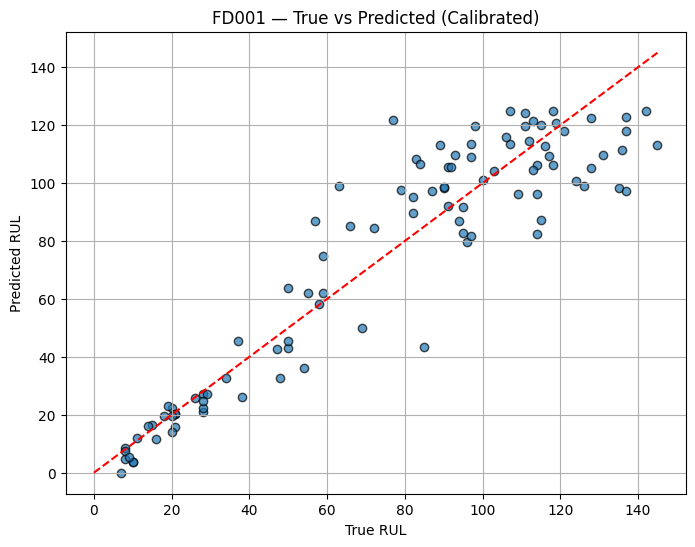

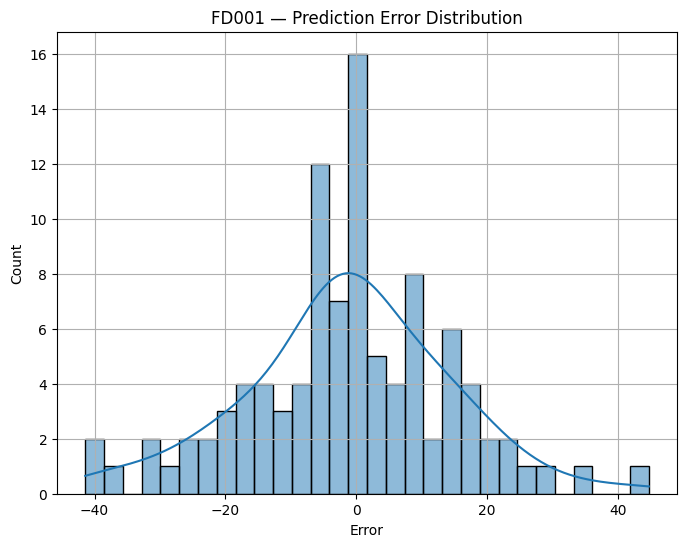

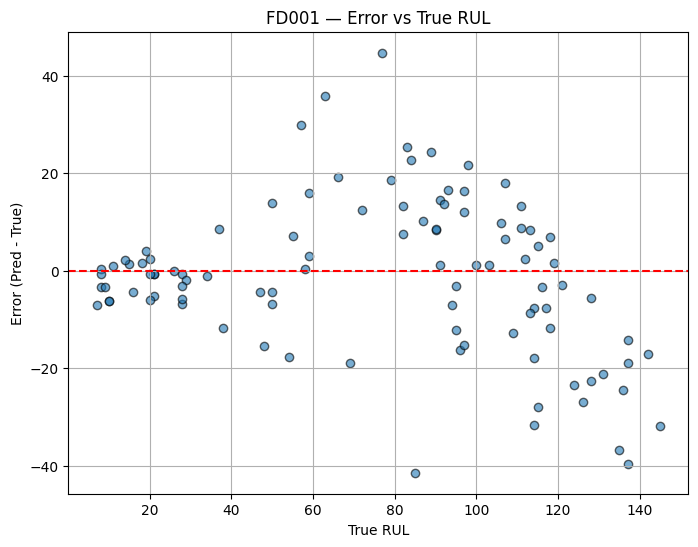


 TOP 10 WORST FD001 ENGINES 


,unit,True_RUL,Pred_RUL,Error,Abs_Error
66,67,77,121.747856,44.747856,44.747856
92,93,85,43.567104,-41.432896,41.432896
95,96,137,97.258003,-39.741997,39.741997
46,47,135,98.166710,-36.833290,36.833290
78,79,63,98.891159,35.891159,35.891159
24,25,145,113.224785,-31.775215,31.775215
44,45,114,82.427994,-31.572006,31.572006
20,21,57,86.983482,29.983482,29.983482
29,30,115,87.098846,-27.901154,27.901154
73,74,126,99.130211,-26.869789,26.869789


[INFO] FD001 error analysis complete.


In [31]:
# 31. FD001 TEST PLOTS & ERROR ANALYSIS


import matplotlib.pyplot as plt
import seaborn as sns

log(" FD001 TEST — VISUALIZATION & ERROR ANALYSIS ")

true_rul = y_test_last_true
pred_rul = y_test_pred_calibrated
errors   = pred_rul - true_rul

# 1. True vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(true_rul, pred_rul, alpha=0.7, edgecolor="k")
plt.plot([0, max(true_rul)], [0, max(true_rul)], "r--")
plt.xlabel("True RUL")
plt.ylabel("Predicted RUL")
plt.title("FD001 — True vs Predicted (Calibrated)")
plt.grid(True)
plt.show()

# 2. Error histogram
plt.figure(figsize=(8,6))
sns.histplot(errors, bins=30, kde=True)
plt.title("FD001 — Prediction Error Distribution")
plt.xlabel("Error")
plt.grid(True)
plt.show()

# 3. Error vs True RUL
plt.figure(figsize=(8,6))
plt.scatter(true_rul, errors, alpha=0.6, edgecolor="k")
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("True RUL")
plt.ylabel("Error (Pred - True)")
plt.title("FD001 — Error vs True RUL")
plt.grid(True)
plt.show()

# 4. Worst engines
df_errors_fd001 = pd.DataFrame({
    "unit": np.arange(1, len(true_rul)+1),
    "True_RUL": true_rul,
    "Pred_RUL": pred_rul,
    "Error": errors,
    "Abs_Error": np.abs(errors)
})

df_errors_sorted_fd001 = df_errors_fd001.sort_values("Abs_Error", ascending=False)

print("\n TOP 10 WORST FD001 ENGINES ")
display(df_errors_sorted_fd001.head(10))

log("FD001 error analysis complete.")


# **32. FD001 NASA SCORE (Final, Clean Version)**

This step computes the **final NASA asymmetric score** on the calibrated FD001 test predictions.  
NASA’s metric penalizes **late predictions more heavily** than early ones, making it essential for realistic engine health forecasting.

We report:

- **Total NASA score**  
- **Mean NASA score** (primary comparison metric across datasets/models)  
- **Save the score** for deployment and unified pipeline use.

This provides the final performance indicator for FD001 after full calibration.

In [32]:
# 32. FD001 NASA SCORE (FINAL CLEAN VERSION)


log(" FD001 NASA Asymmetric Score (TEST) ")

total_nasa, mean_nasa = nasa_asymmetric_score(
    y_test_last_true,
    y_test_pred_calibrated
)

print(f"\nFD001 NASA SCORE (TEST CALIBRATED): {total_nasa:.4f}")
print(f"Mean NASA score: {mean_nasa:.4f}")

# Save NASA score
save_path = os.path.join(BASE_PATH_FD001, "FD001_NASA_SCORE.txt")
with open(save_path, "w") as f:
    f.write(f"FD001 NASA Score (Calibrated): {total_nasa:.4f}\n")
    f.write(f"Mean NASA: {mean_nasa:.4f}\n")

print(f"Saved NASA score to:\n{save_path}")


[INFO]  FD001 NASA Asymmetric Score (TEST) 

FD001 NASA SCORE (TEST CALIBRATED): 401.9492
Mean NASA score: 4.0195
Saved NASA score to:
/content/drive/MyDrive/OIL PREDICTIVE MAINTAINANCE/CMaps/FD001_NASA_SCORE.txt


# **33. Save FD001 Test Output + Final Summary**

This step stores the **final FD001 test predictions** (true RUL, raw predictions, calibrated predictions) in a CSV file for evaluation and deployment use.  
It also prints a concise **performance summary**, including:

- Best selected model  
- Validation RMSE & MAE  
- Final calibrated NASA score  
- Applied calibration shift and max-RUL cap  

This provides a complete, ready-to-report overview of FD001 model performance.


In [33]:
# 33. SAVE FD001 TEST RESULTS + SUMMARY (FIXED)


# Save test results CSV
results_path = os.path.join(BASE_PATH_FD001, "FD001_TEST_RESULTS.csv")
df_fd001_test_out.to_csv(results_path, index=False)
log(f"FD001 test results saved to: {results_path}")

print("\n FD001 SUMMARY ")
print(f"Best Model Used        : {best_model_name_fd001}")
print(f"Validation RMSE        : {df_fd001_leaderboard.loc[best_model_name_fd001, 'RMSE_val']:.4f}")
print(f"Validation MAE         : {df_fd001_leaderboard.loc[best_model_name_fd001, 'MAE_val']:.4f}")
print(f"Mean NASA (test)       : {mean_nasa:.4f}")
print(f"Shift Used             : {BEST_NASA_SHIFT_FD001}")
print(f"Max RUL Cap Used       : {MAX_RUL_NASA_FD001}")

log("FD001 summary complete.")


[INFO] FD001 test results saved to: /content/drive/MyDrive/OIL PREDICTIVE MAINTAINANCE/CMaps/FD001_TEST_RESULTS.csv

 FD001 SUMMARY 
Best Model Used        : GRU_BASE
Validation RMSE        : 12.3222
Validation MAE         : 9.2479
Mean NASA (test)       : 4.0195
Shift Used             : 3.0
Max RUL Cap Used       : 125.0
[INFO] FD001 summary complete.


# **34. Save FD001 Config File**

This step generates a structured JSON configuration file that captures all critical metadata required for inference and deployment.  
The config includes:

- Best model name and saved model path  
- Paths to feature scaler and RUL scaler  
- Raw and engineered feature column lists  
- Sequence length used for FD001  
- NASA calibration parameters (shift and max-RUL cap)

Storing these details ensures the FD001 model can be **reloaded consistently** in any production or unified pipeline environment.

In [34]:
# 34. SAVE FD001 MODEL CONFIGURATION


import json
import os

log("Saving FD001 configuration...")

fd001_config = {
    "best_model_name": best_model_name_fd001,
    "model_path": f"{models_dir_fd001}/FD001_{best_model_name_fd001}_BEST.keras",
    "feature_scaler_path": scaler_path,
    "rul_scaler_path": rul_scaler_path,
    # raw feature columns before rolling/delta
    "feature_columns": feature_cols,
    # final engineered feature columns used for training (93 cols)
    "final_feature_columns": feature_cols_final_fd001,
    "sequence_length": SEQ_LEN_FD001,
    "nasa_shift": BEST_NASA_SHIFT_FD001,
    "nasa_max_rul_cap": MAX_RUL_NASA_FD001
}

config_path_fd001 = os.path.join(models_dir_fd001, "FD001_config.json")

with open(config_path_fd001, "w") as f:
    json.dump(fd001_config, f, indent=4)

print(f" FD001 config saved to:\n{config_path_fd001}")


[INFO] Saving FD001 configuration...
 FD001 config saved to:
/content/drive/MyDrive/OIL PREDICTIVE MAINTAINANCE/CMaps/models_fd001/FD001_config.json
